In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from typing import Optional, Tuple


sns.set()

In [2]:
df = pd.read_csv("../data/dataset/higher_education_students_performance.csv").astype(str)
attribute_info = pd.read_json("../data/dataset/higher_education_students_performance_attribute_info.json")
df.columns = attribute_info["attribute_name"].values
for column in df.columns:
    mask = attribute_info["attribute_name"] == column
    mapping = attribute_info[mask]["mapping"]
    df[column] = df[column].replace(mapping.values[0])
df.columns = df.columns.str.lower().str.replace(" ", "_").str.replace("_{/4.00}", "")

df.head()

,student_id,student_age,sex,graduated_high-school_type,scholarship_type,additional_work,regular_artistic_or_sports_activity,do_you_have_a_partner,total_salary_if_available,transportation_to_the_university,...,preparation_to_midterm_exams_1,preparation_to_midterm_exams_2,taking_notes_in_classes,listening_in_classes,discussion_improves_my_interest_and_success_in_the_course,flip-classroom,cumulative_grade_point_average_in_the_last_semester,expected_cumulative_grade_point_average_in_the_graduation,course_id,output_grade
0,STUDENT1,22-25,male,other,50%,Yes,No,No,USD 135-200,Bus,...,alone,closest date to the exam,always,sometimes,never,useful,<2.00,<2.00,1,DD
1,STUDENT2,22-25,male,other,50%,Yes,No,No,USD 135-200,Bus,...,alone,closest date to the exam,always,sometimes,always,useful,2.00-2.49,2.50-2.99,1,DD
2,STUDENT3,22-25,male,state,50%,No,No,No,USD 201-270,Other,...,alone,closest date to the exam,sometimes,sometimes,never,not useful,2.00-2.49,2.00-2.49,1,DD
3,STUDENT4,18-21,female,private,50%,Yes,No,Yes,USD 201-270,Bus,...,alone,regularly during the semester,always,sometimes,sometimes,not useful,2.50-2.99,2.00-2.49,1,DD
4,STUDENT5,22-25,male,private,50%,No,No,Yes,USD 271-340,Bus,...,with friends,closest date to the exam,sometimes,sometimes,sometimes,not useful,2.00-2.49,2.00-2.49,1,DD


# Pre Processamento

In [3]:
column = "student_age"
categories = ["18-21", "22-25", "above 26"]
df[column] = pd.Categorical(df[column], categories=categories, ordered=True)

column = "scholarship_type"
categories = ["None", "25%", "50%", "75%", "Full"]
df[column] = pd.Categorical(df[column], categories=categories, ordered=True)

column = "total_salary_if_available"
categories = ["USD 135-200", "USD 201-270", "USD 271-340", "USD 341-410", "above 410"]
df[column] = pd.Categorical(df[column], categories=categories, ordered=True)

column = "expected_cumulative_grade_point_average_in_the_graduation"
categories = ["<2.00", "2.00-2.49", "2.50-2.99", "3.00-3.49"]
df[column] = pd.Categorical(df[column], categories=categories, ordered=True)

column = "cumulative_grade_point_average_in_the_last_semester"
categories = ["<2.00", "2.00-2.49", "2.50-2.99", "3.00-3.49", "above 3.49"]
df[column] = pd.Categorical(df[column], categories=categories, ordered=True)

column = "output_grade"
categories = ["AA", "BA", "BB", "CB", "CC", "DC", "DD", "Fail"]
df[column] = pd.Categorical(df[column], categories=categories, ordered=True)

# EAD

## Funções para plot

In [4]:
def normalized_catplot(
    df: pd.DataFrame,
    feature: str,
    group: str,
    figsize: Optional[Tuple[int]] = (9, 4),
    ylim: Optional[int] = 100,
    title: Optional[str] = "",
    **kwargs
) -> None:
    normalized_df = df.groupby(group)[feature].value_counts(normalize=True)
    normalized_df = normalized_df.mul(100)
    normalized_df = normalized_df.rename("percent").reset_index()

    if isinstance(df[feature].dtype, pd.CategoricalDtype):
        hue_order = normalized_df[feature].unique().categories
    else:
        hue_order = normalized_df[feature].unique()

    graph = sns.catplot(
        data=normalized_df,
        x=group,
        y="percent",
        hue=feature,
        kind="bar",
        hue_order=hue_order,
        legend_out=False,
        **kwargs
    )

    graph.fig.set_size_inches(*figsize)
    graph.ax.set_ylim(0, ylim)
    graph.ax.set_title(title)

    for p in graph.ax.patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        txt = p.get_height().round(1)
        graph.ax.annotate(
            txt,
            (x, y + 2),
            ha="center",
            va="center",
            fontsize=9,
            color="#555",
            fontweight="normal",
        )

## Composição do dataset

In [5]:
columns = [
    "student_age",
    "sex",
    "graduated_high-school_type",
    "scholarship_type",
    "additional_work",
    "expected_cumulative_grade_point_average_in_the_graduation",
]

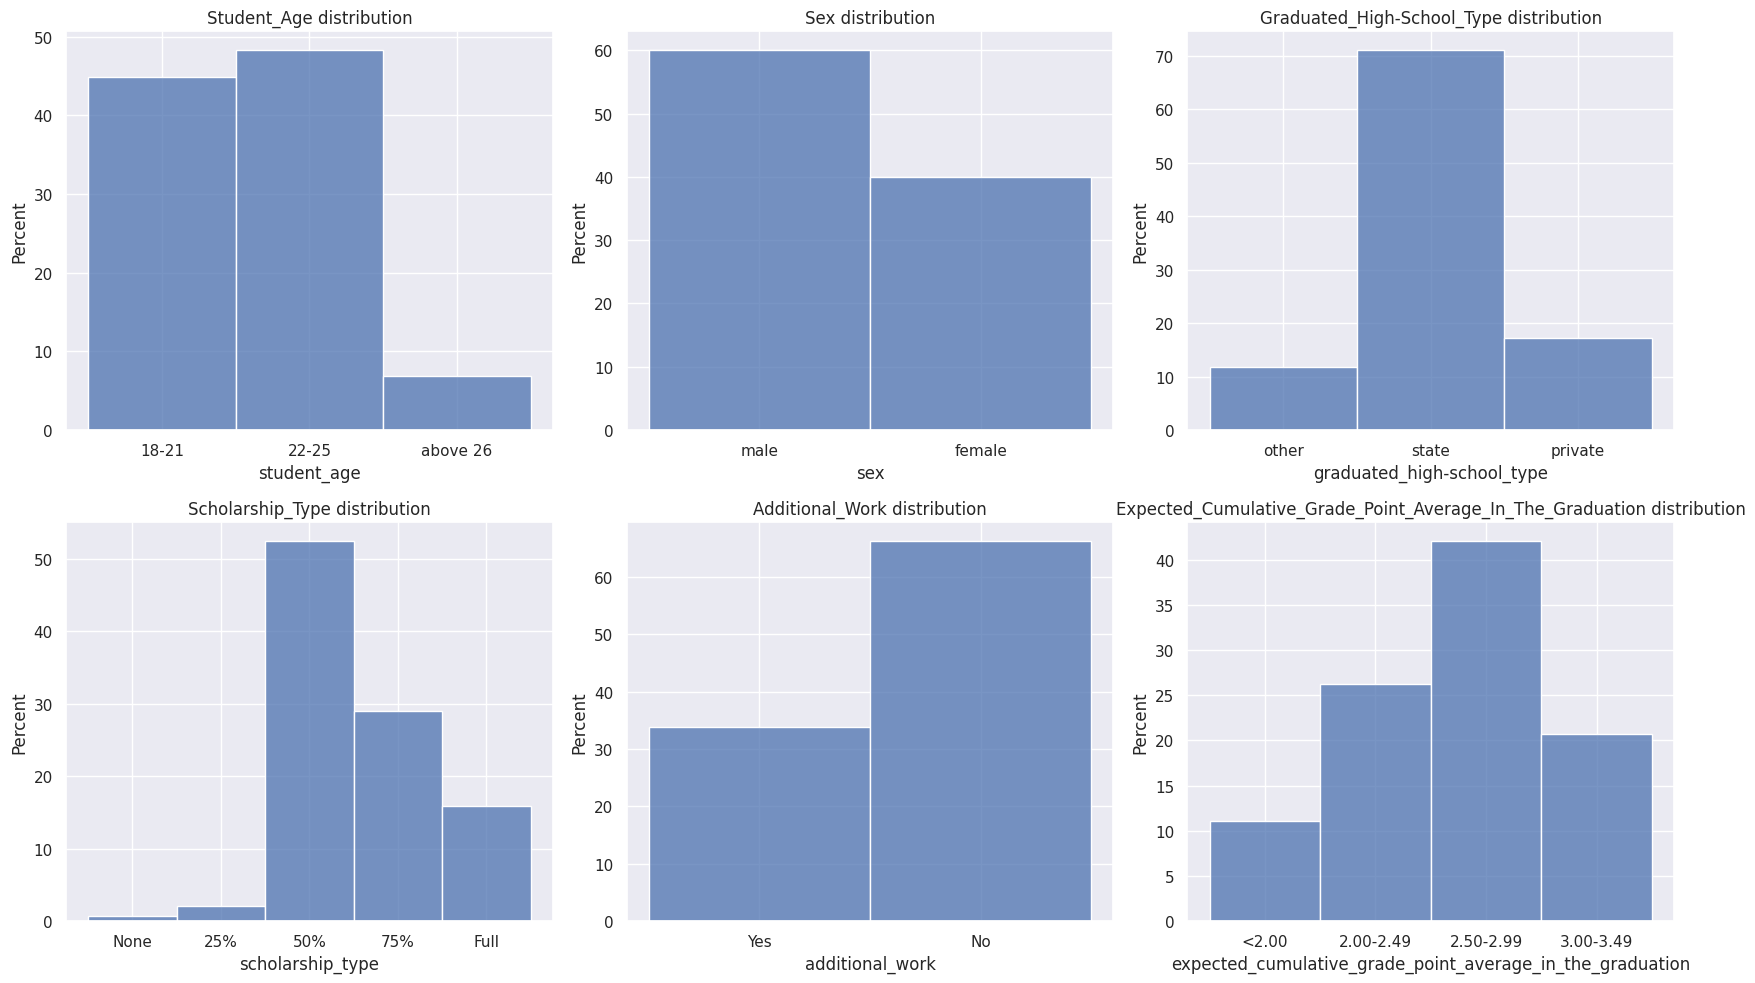

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(17, 10))
axes = axes.ravel()
for ax, column in zip(axes, columns):
    sns.histplot(data=df, x=column, ax=ax, stat="percent")
    ax.set_title(column.title() + " distribution")

fig.tight_layout()

## Nota esperada

/home/tiago/.virtualenvs/unicamp-mo810/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


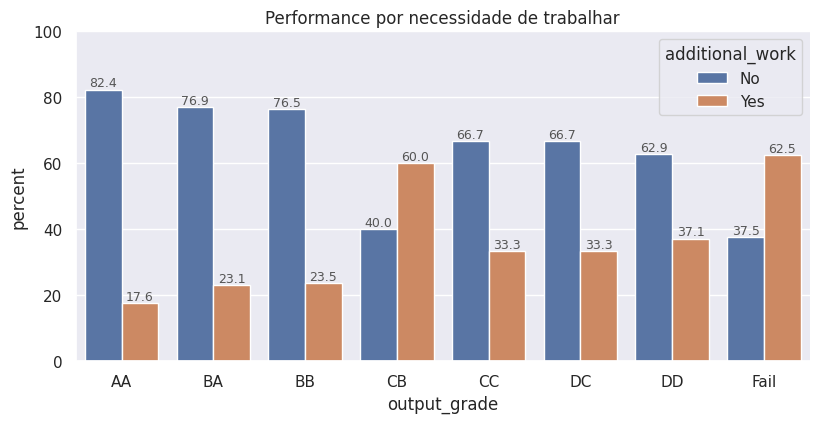

In [7]:
group = "output_grade"
feature = "additional_work"

normalized_catplot(df=df, group=group, feature=feature, title="Performance por necessidade de trabalhar")